# Process PSID dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import xmltodict

## Parse the .xml codebook

In [2]:
with open("../data/psid/J322214_codebook.xml", "r", encoding = "cp1252") as file:
    xml_text = file.read()
file.close()

In [3]:
codebook_dict = xmltodict.parse(xml_text)
codebook_dict = codebook_dict["CODEXML"]['LIST_JOBID']['JOBID']['LIST_VARIABLE']['VARIABLE']

In [4]:
codebook_df = pd.DataFrame(codebook_dict)
codebook_df

,YEAR,TYPE_ID,NAME,LABEL,QTEXT,ETEXT,LIST_CODE
0,1968,0,ER30000,RELEASE NUMBER,Release Number,None,"{'CODE': {'VALUE': '1', 'TEXT': 'Release numbe..."
1,1968,0,ER30001,1968 INTERVIEW NUMBER,1968 Interview Number (1968 ID Number),This variable is the 1968 family ID number. Th...,"{'CODE': [{'VALUE': '1 - 2,930', 'TEXT': 'Memb..."
2,1968,0,ER30002,PERSON NUMBER 68,Person Number,None,"{'CODE': [{'VALUE': '1 - 19', 'TEXT': 'Individ..."
3,2001,1,ER17001,RELEASE NUMBER,Release Number,"May 2008: Variables ER20395-ER20458, formerly...","{'CODE': [{'VALUE': '1', 'TEXT': 'Release numb..."
4,2001,1,ER17002,2001 FAMILY INTERVIEW (ID) NUMBER,2001 Interview Number,The values for this variable represent the 200...,"{'CODE': {'VALUE': '1 - 7,457', 'TEXT': 'Inter..."
...,...,...,...,...,...,...,...
450,2021,1,ER81838,IMP WEALTH W/ EQUITY (WEALTH2) 2021,"Constructed Wealth Variable, Including Equity.","Constructed wealth variable, including equity....","{'CODE': [{'VALUE': '-99,999,997 - -1', 'TEXT'..."
451,2021,1,ER81958,2021 CORE/IMMIGRANT FAM WEIGHT NUMBER 1,2021 Core/Immigrant Family Longitudinal Weight,The weight is constructed by summing the indiv...,"{'CODE': {'VALUE': '.001 - 200.000', 'TEXT': '..."
452,2021,2,ER34901,2021 INTERVIEW NUMBER,2021 Interview Number (2021 ID Number),The values for this variable represent the 202...,"{'CODE': [{'VALUE': '1 - 9,614', 'TEXT': '2021..."
453,2021,2,ER34902,SEQUENCE NUMBER 21,2021 Sequence Number,This variable provides a means of identifying ...,"{'CODE': [{'VALUE': '1 - 20', 'TEXT': 'Individ..."


In [5]:
# standardize the column/label names
def label_reorg_func(label:str):
    if "FAMILY INTERVIEW (ID) NUMBER" in label:
        return "family_interview_id"
    if "TOTAL FAMILY INCOME" in label:
        return "total_family_income"
    if "WTR DONATED TO ORGANIZATN FOR HEALTH" in label:
        return "wtr_donated_to_health_org"
    if "DOLLAR AMT OF HEALTH DONATIONS" in label:
        return "amt_of_health_donations"
    if "SEQUENCE NUMBER" in label:
        return "sequence_number"
    if "SEX OF" in label:
        return "sex"
    if "RELATION TO" in label:
        return "relation_to_rp"
    if "CHILDREN" in label:
        return "number_of_children_in_fu"
    if ("HEALTH" in label) and ("STATUS" in label):
        return "health_status"
    if "RELIGIOUS PREF" in label:
        return "religion"
    if "MARITAL STATUS" in label:
        return "marital_status"
    if "RACE OF" in label:
        return "race"
    if "AGE OF" in label:
        return "age"
    if "IMP WEALTH W/O EQUITY" in label:
        return "wealth_wo_equity"
    if "IMP WEALTH W/ EQUITY" in label:
        return "wealth_with_equity"
    if "WTR DONATION&gt;25" in label:
        return "wtr_donated" 
    if "WTR DONATED TO RELIGIOUS ORGANIZATION" in label:
        return "wtr_donated_to_religious_org"
    if "DOLLAR AMT OF RELIGIOUS DONATIONS" in label:
        return "amt_of_religious_donations"
    if "WTR DONATD TO COMBO PURPOSE ORGANIZTN" in label:
        return "wtr_donated_to_combo_purpose_org"
    if "DOLLAR AMT OF COMBO DONATIONS" in label:
        return "amt_of_combo_donations"
    if "WTR DONATED TO ORGANIZATION FOR NEEDY" in label:
        return "wtr_donated_to_org_for_needy"
    if "DOLLAR AMT OF NEEDY DONATIONS" in label:
        return "amt_of_needy_donations"
    if "WTR DONATED TO ORGANZTION FOR EDUCATN" in label:
        return "wtr_donated_to_edu_org"
    if "DOLLAR AMT OF EDUCATION DONATIONS" in label:
        return "amt_of_edu_donations"
    if "WTR DONATED TO YOUTH ORGANIZATIONS" in label:
        return "wtr_donated_to_youth_org"
    if "DOLLAR AMT OF YOUTH ORG DONATIONS" in label:
        return "amt_of_youth_donations"
    if "WTR DONATED TO CULTURAL ORGS" in label:
        return "wtr_donated_to_cultural_org"
    if "DOLLAR AMT OF CULTURAL DONATIONS" in label:
        return "amt_of_cultural_donations"
    if "WTR DONATED TO COMMUNITY ORGS" in label:
        return "wtr_donated_to_community_org"
    if "DOLLAR AMT OF COMMUNITY DONATIONS" in label:
        return "amt_of_community_donations"
    if "WTR DONATED TO ENVIRONMENT ORGS" in label:
        return "wtr_donated_to_env_org"
    if "DOLLAR AMT OF ENVIRONMENT DONATION" in label:
        return "amt_of_env_donations"
    if "WTR DONATED TO OTHER ORGANIZATIONS" in label:
        return "wtr_donated_to_other"
    if ("AMT DONATED TO ORGS IN T7A-F" in label) or ("DOLLAR AMT OF OTHER DONATIONS" in label):
        return "amt_of_other_donations"
    if "WTR DONATED TO INTERNATL/PEACE ORG" in label:
        return "wtr_donated_intl/peace_org"
    if "DOLLAR AMT OF INTERNATL/PEACE DNTN" in label:
        return "amt_of_intl/peace_donations"
    if "PERSON NUMBER" in label:
        return "person_number"
    if "WEIGHT" in label:
        return "weight"
    return label.replace(" ", "_").lower()

codebook_df["STANDARDIZED_LABEL"] = codebook_df.LABEL.apply(label_reorg_func)
codebook_df

,YEAR,TYPE_ID,NAME,LABEL,QTEXT,ETEXT,LIST_CODE,STANDARDIZED_LABEL
0,1968,0,ER30000,RELEASE NUMBER,Release Number,None,"{'CODE': {'VALUE': '1', 'TEXT': 'Release numbe...",release_number
1,1968,0,ER30001,1968 INTERVIEW NUMBER,1968 Interview Number (1968 ID Number),This variable is the 1968 family ID number. Th...,"{'CODE': [{'VALUE': '1 - 2,930', 'TEXT': 'Memb...",1968_interview_number
2,1968,0,ER30002,PERSON NUMBER 68,Person Number,None,"{'CODE': [{'VALUE': '1 - 19', 'TEXT': 'Individ...",person_number
3,2001,1,ER17001,RELEASE NUMBER,Release Number,"May 2008: Variables ER20395-ER20458, formerly...","{'CODE': [{'VALUE': '1', 'TEXT': 'Release numb...",release_number
4,2001,1,ER17002,2001 FAMILY INTERVIEW (ID) NUMBER,2001 Interview Number,The values for this variable represent the 200...,"{'CODE': {'VALUE': '1 - 7,457', 'TEXT': 'Inter...",family_interview_id
...,...,...,...,...,...,...,...,...
450,2021,1,ER81838,IMP WEALTH W/ EQUITY (WEALTH2) 2021,"Constructed Wealth Variable, Including Equity.","Constructed wealth variable, including equity....","{'CODE': [{'VALUE': '-99,999,997 - -1', 'TEXT'...",wealth_with_equity
451,2021,1,ER81958,2021 CORE/IMMIGRANT FAM WEIGHT NUMBER 1,2021 Core/Immigrant Family Longitudinal Weight,The weight is constructed by summing the indiv...,"{'CODE': {'VALUE': '.001 - 200.000', 'TEXT': '...",weight
452,2021,2,ER34901,2021 INTERVIEW NUMBER,2021 Interview Number (2021 ID Number),The values for this variable represent the 202...,"{'CODE': [{'VALUE': '1 - 9,614', 'TEXT': '2021...",2021_interview_number
453,2021,2,ER34902,SEQUENCE NUMBER 21,2021 Sequence Number,This variable provides a means of identifying ...,"{'CODE': [{'VALUE': '1 - 20', 'TEXT': 'Individ...",sequence_number


In [6]:
codebook_df.STANDARDIZED_LABEL.unique()

array(['release_number', '1968_interview_number', 'person_number',
       'family_interview_id', 'psid_state_of_residence_code',
       'family_composition_change', 'age', 'sex',
       'number_of_children_in_fu', '1968_family_identifier',
       'marital_status', 'health_status', 'race', 'religion',
       'wtr_donated', 'wtr_donated_to_religious_org',
       'amt_of_religious_donations', 'wtr_donated_to_combo_purpose_org',
       'amt_of_combo_donations', 'wtr_donated_to_org_for_needy',
       'amt_of_needy_donations', 'wtr_donated_to_health_org',
       'amt_of_health_donations', 'wtr_donated_to_edu_org',
       'amt_of_edu_donations', 't7a_wtr_donated_to_youth/family_organztn',
       't7b_wtr_donatd_to_arts/cultr/ethnic_assn',
       't7c_wtr_donatd_to_neighborhood/community',
       't7d_wtr_donated_to_environmental_org',
       't7e_wtr_donatd_to_intrnat_aid/wrld_peace',
       't7f_wtr_donated_to_other_charity', 'amt_of_other_donations',
       'weight', 'total_family_social_se

In [7]:
code_mapping_dict_year = codebook_df.set_index("NAME").YEAR.to_dict()
code_mapping_dict_stdlab = codebook_df.set_index("NAME").STANDARDIZED_LABEL.to_dict()

# Wrangle .csv for analysis

In [8]:
# This line does NOT work because the .xlsx is encoded with "synchVertical" rather than "syncVertical",
# and oepnpyxl does not support synchVertical.
# Current solution: use local MS Excel to export data manually to a .csv

# psid_raw = pd.read_excel("../data/psid/J321540.xlsx", sheet_name="Data")

psid_raw = pd.read_csv("../data/psid/J322214.csv")
psid_raw

,ER30000,ER30001,ER30002,ER17001,ER17002,ER17004,ER17007,ER17013,ER17014,ER17016,...,ER81407,ER81414,ER81416,ER81775,ER81836,ER81838,ER81958,ER34901,ER34902,ER34903
0,1,4,3,7.0,96.0,41.0,1.0,49.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,4,4,7.0,5987.0,41.0,0.0,47.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,1,4,5,7.0,6872.0,41.0,1.0,57.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
3,1,4,6,7.0,5599.0,15.0,0.0,43.0,1.0,0.0,...,0.0,5.0,0.0,51560.0,2000.0,2000.0,23.045,7137,81,10
4,1,4,7,7.0,7091.0,41.0,0.0,41.0,2.0,1.0,...,0.0,5.0,0.0,11720.0,50000.0,230000.0,40.128,4890,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43011,1,6872,181,7.0,5477.0,12.0,0.0,39.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
43012,1,6872,182,7.0,3616.0,12.0,0.0,44.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
43013,1,6872,183,7.0,3616.0,12.0,0.0,44.0,1.0,2.0,...,0.0,5.0,0.0,160413.0,63500.0,133500.0,2.247,5084,1,10
43014,1,6872,184,7.0,5477.0,12.0,0.0,39.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


In [9]:
# stash each year's income, contribution, etc. into same columns.
# Strategy: map each var's year and label in codebook and do a groupby

psid_year_grouped = psid_raw.groupby(by = code_mapping_dict_year, axis=1)
psid_processed_long = pd.concat([psid_year.rename(columns=code_mapping_dict_stdlab).assign(YEAR = year) for year, psid_year in psid_year_grouped], axis=0)

# this cannot be used as is because families missing certain
# years of interviews are still kept in the original .csv with
# a value of nan in the year's variables


In [10]:
psid_processed_long

,release_number,1968_interview_number,person_number,YEAR,family_interview_id,psid_state_of_residence_code,family_composition_change,age,sex,number_of_children_in_fu,...,2015_interview_number,2017_interview_number,2019_interview_number,mgroup1_wtr_donate_combo/needy/med/intl,mgroup2_wtr_donate_educ/youth/cultr/envr,mcovid1_wtr_donate_to_help_re_pandemic,mcovid2_wtr_pandemic_donations_crowdfund,mcovid3_largest_crowdfund_donation_to,mcovid4_dollar_amt_pandemic_donations,2021_interview_number
0,1.0,4.0,3.0,1968,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,4.0,4.0,1968,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,4.0,5.0,1968,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,4.0,6.0,1968,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,4.0,7.0,1968,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43011,NaN,NaN,NaN,2021,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
43012,NaN,NaN,NaN,2021,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
43013,1.0,NaN,NaN,2021,5084.0,42.0,0.0,41.0,1.0,2.0,...,NaN,NaN,NaN,5.0,5.0,5.0,0.0,0.0,0.0,5084.0
43014,NaN,NaN,NaN,2021,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [11]:
psid_processed = pd.concat([psid_year.rename(columns=code_mapping_dict_stdlab).assign(year = year) for year, psid_year in psid_year_grouped], axis=1)

In [12]:
psid_processed

,release_number,1968_interview_number,person_number,year,release_number,family_interview_id,psid_state_of_residence_code,family_composition_change,age,sex,...,wtr_donated_to_other,amt_of_other_donations,total_family_income,wealth_wo_equity,wealth_with_equity,weight,2021_interview_number,sequence_number,relation_to_rp,year
0,1,4,3,1968,7.0,96.0,41.0,1.0,49.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,2021
1,1,4,4,1968,7.0,5987.0,41.0,0.0,47.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,2021
2,1,4,5,1968,7.0,6872.0,41.0,1.0,57.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,2021
3,1,4,6,1968,7.0,5599.0,15.0,0.0,43.0,1.0,...,5.0,0.0,51560.0,2000.0,2000.0,23.045,7137,81,10,2021
4,1,4,7,1968,7.0,7091.0,41.0,0.0,41.0,2.0,...,5.0,0.0,11720.0,50000.0,230000.0,40.128,4890,1,10,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43011,1,6872,181,1968,7.0,5477.0,12.0,0.0,39.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,2021
43012,1,6872,182,1968,7.0,3616.0,12.0,0.0,44.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,2021
43013,1,6872,183,1968,7.0,3616.0,12.0,0.0,44.0,1.0,...,5.0,0.0,160413.0,63500.0,133500.0,2.247,5084,1,10,2021
43014,1,6872,184,1968,7.0,5477.0,12.0,0.0,39.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,2021


In [13]:
psid_processed["individual_id"] = psid_processed["1968_interview_number"] * 1000 + psid_processed["person_number"]

In [14]:
psid_processed.columns.unique()

Index(['release_number', '1968_interview_number', 'person_number', 'year',
       'family_interview_id', 'psid_state_of_residence_code',
       'family_composition_change', 'age', 'sex', 'number_of_children_in_fu',
       '1968_family_identifier', 'marital_status', 'health_status', 'race',
       'religion', 'wtr_donated', 'wtr_donated_to_religious_org',
       'amt_of_religious_donations', 'wtr_donated_to_combo_purpose_org',
       'amt_of_combo_donations', 'wtr_donated_to_org_for_needy',
       'amt_of_needy_donations', 'wtr_donated_to_health_org',
       'amt_of_health_donations', 'wtr_donated_to_edu_org',
       'amt_of_edu_donations', 't7a_wtr_donated_to_youth/family_organztn',
       't7b_wtr_donatd_to_arts/cultr/ethnic_assn',
       't7c_wtr_donatd_to_neighborhood/community',
       't7d_wtr_donated_to_environmental_org',
       't7e_wtr_donatd_to_intrnat_aid/wrld_peace',
       't7f_wtr_donated_to_other_charity', 'amt_of_other_donations', 'weight',
       'total_family_social_s

In [15]:
psid_sub = psid_processed.drop(columns = ['release_number', '1968_interview_number', 'person_number','2003_interview_number', '2005_interview_number',
       '2007_interview_number', '2009_interview_number',
       '2011_interview_number', '2013_interview_number',
       '2015_interview_number', '2017_interview_number',
       '2019_interview_number','2001_interview_number','2021_interview_number'])

In [16]:
psid_sub

,year,family_interview_id,psid_state_of_residence_code,family_composition_change,age,sex,number_of_children_in_fu,1968_family_identifier,marital_status,health_status,...,wtr_donated_to_other,amt_of_other_donations,total_family_income,wealth_wo_equity,wealth_with_equity,weight,sequence_number,relation_to_rp,year,individual_id
0,1968,96.0,41.0,1.0,49.0,1.0,1.0,4.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2021,4003
1,1968,5987.0,41.0,0.0,47.0,2.0,0.0,4.0,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2021,4004
2,1968,6872.0,41.0,1.0,57.0,1.0,1.0,4.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2021,4005
3,1968,5599.0,15.0,0.0,43.0,1.0,0.0,4.0,4.0,2.0,...,5.0,0.0,51560.0,2000.0,2000.0,23.045,81,10,2021,4006
4,1968,7091.0,41.0,0.0,41.0,2.0,1.0,4.0,4.0,2.0,...,5.0,0.0,11720.0,50000.0,230000.0,40.128,1,10,2021,4007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43011,1968,5477.0,12.0,0.0,39.0,1.0,4.0,6872.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2021,6872181
43012,1968,3616.0,12.0,0.0,44.0,1.0,2.0,6872.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2021,6872182
43013,1968,3616.0,12.0,0.0,44.0,1.0,2.0,6872.0,1.0,4.0,...,5.0,0.0,160413.0,63500.0,133500.0,2.247,1,10,2021,6872183
43014,1968,5477.0,12.0,0.0,39.0,1.0,4.0,6872.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2021,6872184


## Drop the DK, NA columns

In [26]:
psid_sub = psid_sub[(psid_sub['mgroup1_wtr_donate_combo/needy/med/intl'] != 8) &
                    (psid_sub['mgroup1_wtr_donate_combo/needy/med/intl'] != 9) & 
                    (psid_sub['mgroup1_wtr_donate_combo/needy/med/intl'] != 0) & 
                    (psid_sub['mgroup2_wtr_donate_educ/youth/cultr/envr'] != 8) &
                    (psid_sub['mgroup2_wtr_donate_educ/youth/cultr/envr'] != 9) &
                    (psid_sub['mgroup2_wtr_donate_educ/youth/cultr/envr'] != 0) & 
                    (psid_sub['mcovid1_wtr_donate_to_help_re_pandemic'] != 8) &
                    (psid_sub['mcovid1_wtr_donate_to_help_re_pandemic'] != 9) &
                    (psid_sub['mcovid1_wtr_donate_to_help_re_pandemic'] != 0)] 

In [27]:
len(psid_sub)

42271

### Clean the 2021 data

In [28]:
psid_sub['wtr_donated-2021'] = np.where( ((psid_sub['mgroup1_wtr_donate_combo/needy/med/intl'] == 1) | (psid_sub['mgroup2_wtr_donate_educ/youth/cultr/envr'] == 1) | (psid_sub['mcovid1_wtr_donate_to_help_re_pandemic'] == 1)), 1, 5)

In [29]:
psid_sub

,year,family_interview_id,psid_state_of_residence_code,family_composition_change,age,sex,number_of_children_in_fu,1968_family_identifier,marital_status,health_status,...,amt_of_other_donations,total_family_income,wealth_wo_equity,wealth_with_equity,weight,sequence_number,relation_to_rp,year,individual_id,wtr_donated-2021
0,1968,96.0,41.0,1.0,49.0,1.0,1.0,4.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0,0,2021,4003,5
1,1968,5987.0,41.0,0.0,47.0,2.0,0.0,4.0,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,0,0,2021,4004,5
2,1968,6872.0,41.0,1.0,57.0,1.0,1.0,4.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,0,0,2021,4005,5
3,1968,5599.0,15.0,0.0,43.0,1.0,0.0,4.0,4.0,2.0,...,0.0,51560.0,2000.0,2000.0,23.045,81,10,2021,4006,5
4,1968,7091.0,41.0,0.0,41.0,2.0,1.0,4.0,4.0,2.0,...,0.0,11720.0,50000.0,230000.0,40.128,1,10,2021,4007,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43011,1968,5477.0,12.0,0.0,39.0,1.0,4.0,6872.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,0,0,2021,6872181,5
43012,1968,3616.0,12.0,0.0,44.0,1.0,2.0,6872.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,0,0,2021,6872182,5
43013,1968,3616.0,12.0,0.0,44.0,1.0,2.0,6872.0,1.0,4.0,...,0.0,160413.0,63500.0,133500.0,2.247,1,10,2021,6872183,5
43014,1968,5477.0,12.0,0.0,39.0,1.0,4.0,6872.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,0,0,2021,6872184,5


In [30]:
psid_sub = psid_sub.drop(columns = ['mgroup1_wtr_donate_combo/needy/med/intl', 'mgroup2_wtr_donate_educ/youth/cultr/envr', 'total_family_social_security_income-2000', 'm52k2_wtr_donated_$25_or_more'])

In [31]:
psid_sub

,year,family_interview_id,psid_state_of_residence_code,family_composition_change,age,sex,number_of_children_in_fu,1968_family_identifier,marital_status,health_status,...,amt_of_other_donations,total_family_income,wealth_wo_equity,wealth_with_equity,weight,sequence_number,relation_to_rp,year,individual_id,wtr_donated-2021
0,1968,96.0,41.0,1.0,49.0,1.0,1.0,4.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0,0,2021,4003,5
1,1968,5987.0,41.0,0.0,47.0,2.0,0.0,4.0,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,0,0,2021,4004,5
2,1968,6872.0,41.0,1.0,57.0,1.0,1.0,4.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,0,0,2021,4005,5
3,1968,5599.0,15.0,0.0,43.0,1.0,0.0,4.0,4.0,2.0,...,0.0,51560.0,2000.0,2000.0,23.045,81,10,2021,4006,5
4,1968,7091.0,41.0,0.0,41.0,2.0,1.0,4.0,4.0,2.0,...,0.0,11720.0,50000.0,230000.0,40.128,1,10,2021,4007,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43011,1968,5477.0,12.0,0.0,39.0,1.0,4.0,6872.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,0,0,2021,6872181,5
43012,1968,3616.0,12.0,0.0,44.0,1.0,2.0,6872.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,0,0,2021,6872182,5
43013,1968,3616.0,12.0,0.0,44.0,1.0,2.0,6872.0,1.0,4.0,...,0.0,160413.0,63500.0,133500.0,2.247,1,10,2021,6872183,5
43014,1968,5477.0,12.0,0.0,39.0,1.0,4.0,6872.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,0,0,2021,6872184,5


In [32]:
psid_sub.columns.unique()

Index(['year', 'family_interview_id', 'psid_state_of_residence_code',
       'family_composition_change', 'age', 'sex', 'number_of_children_in_fu',
       '1968_family_identifier', 'marital_status', 'health_status', 'race',
       'religion', 'wtr_donated', 'wtr_donated_to_religious_org',
       'amt_of_religious_donations', 'wtr_donated_to_combo_purpose_org',
       'amt_of_combo_donations', 'wtr_donated_to_org_for_needy',
       'amt_of_needy_donations', 'wtr_donated_to_health_org',
       'amt_of_health_donations', 'wtr_donated_to_edu_org',
       'amt_of_edu_donations', 't7a_wtr_donated_to_youth/family_organztn',
       't7b_wtr_donatd_to_arts/cultr/ethnic_assn',
       't7c_wtr_donatd_to_neighborhood/community',
       't7d_wtr_donated_to_environmental_org',
       't7e_wtr_donatd_to_intrnat_aid/wrld_peace',
       't7f_wtr_donated_to_other_charity', 'amt_of_other_donations', 'weight',
       'total_family_income', 'wealth_wo_equity', 'wealth_with_equity',
       'sequence_number'

In [33]:
psid = psid_sub.drop(columns = ['t7a_wtr_donated_to_youth/family_organztn',
       't7b_wtr_donatd_to_arts/cultr/ethnic_assn',
       't7c_wtr_donatd_to_neighborhood/community',
       't7d_wtr_donated_to_environmental_org',
       't7e_wtr_donatd_to_intrnat_aid/wrld_peace',
       't7f_wtr_donated_to_other_charity','wtr_donated_to_religious_org','wtr_donated_to_combo_purpose_org','wtr_donated_to_org_for_needy',
                                    'wtr_donated_to_edu_org','wtr_donated_to_cultural_org', 'wtr_donated_to_youth_org','wtr_donated_to_community_org','wtr_donated_to_env_org', 'wtr_donated_intl/peace_org',
                                   'wtr_donated_to_other'])

In [34]:
# drop individuals that missed any interview over 20 years
# to be modified if we are considering more recent / younger / more families
psid = psid.dropna()

In [35]:
len(psid)

18388

## Wide to Long

In [83]:
test = psid.copy(deep = True)

In [84]:
test

,year,family_interview_id,psid_state_of_residence_code,family_composition_change,age,sex,number_of_children_in_fu,1968_family_identifier,marital_status,health_status,...,amt_of_other_donations,total_family_income,wealth_wo_equity,wealth_with_equity,weight,sequence_number,relation_to_rp,year,individual_id,wtr_donated-2021
3,1968,5599.0,15.0,0.0,43.0,1.0,0.0,4.0,4.0,2.0,...,0.0,51560.0,2000.0,2000.0,23.045,81,10,2021,4006,5
6,1968,285.0,41.0,4.0,28.0,1.0,2.0,4.0,1.0,1.0,...,0.0,9528.0,0.0,0.0,30.877,1,10,2021,4031,5
14,1968,96.0,41.0,1.0,49.0,1.0,1.0,4.0,1.0,1.0,...,0.0,231000.0,7500.0,7500.0,14.996,1,10,2021,4039,5
16,1968,285.0,41.0,4.0,28.0,1.0,2.0,4.0,1.0,1.0,...,0.0,35344.0,0.0,30000.0,14.723,2,22,2021,4041,5
17,1968,285.0,41.0,4.0,28.0,1.0,2.0,4.0,1.0,1.0,...,0.0,64800.0,32000.0,32000.0,2.820,1,10,2021,4042,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42995,1968,3616.0,12.0,0.0,44.0,1.0,2.0,6872.0,1.0,4.0,...,0.0,21726.0,-15082.0,-15082.0,3.069,1,10,2021,6872031,5
42997,1968,3616.0,12.0,0.0,44.0,1.0,2.0,6872.0,1.0,4.0,...,0.0,21726.0,-15082.0,-15082.0,3.069,2,30,2021,6872034,5
42998,1968,3616.0,12.0,0.0,44.0,1.0,2.0,6872.0,1.0,4.0,...,0.0,160413.0,63500.0,133500.0,2.247,3,30,2021,6872035,5
43001,1968,3616.0,12.0,0.0,44.0,1.0,2.0,6872.0,1.0,4.0,...,0.0,160413.0,63500.0,133500.0,2.247,4,30,2021,6872038,5


In [85]:
len(test.columns)

331

In [86]:
# rename the columns
# label each column with year
cols = list(test.columns)

y = 2001
for i in range(1, 27):
    cols[i] += '-' + str(y)
    
y = 2003
for i in range(27, len(cols) - 35, 30):
    for j in range(i, i + 30):
        cols[j] += '-' + str(y)
    y += 2

y = 2021
for i in range(297, 329):
    cols[i] += '-' + str(y)

In [87]:
cols

['year',
 'family_interview_id-2001',
 'psid_state_of_residence_code-2001',
 'family_composition_change-2001',
 'age-2001',
 'sex-2001',
 'number_of_children_in_fu-2001',
 '1968_family_identifier-2001',
 'marital_status-2001',
 'health_status-2001',
 'race-2001',
 'religion-2001',
 'wtr_donated-2001',
 'amt_of_religious_donations-2001',
 'amt_of_combo_donations-2001',
 'amt_of_needy_donations-2001',
 'wtr_donated_to_health_org-2001',
 'amt_of_health_donations-2001',
 'amt_of_edu_donations-2001',
 'amt_of_other_donations-2001',
 'weight-2001',
 'total_family_income-2001',
 'wealth_wo_equity-2001',
 'wealth_with_equity-2001',
 'sequence_number-2001',
 'relation_to_rp-2001',
 'year-2001',
 'family_interview_id-2003',
 'psid_state_of_residence_code-2003',
 'family_composition_change-2003',
 '1968_family_identifier-2003',
 'age-2003',
 'sex-2003',
 'number_of_children_in_fu-2003',
 'marital_status-2003',
 'health_status-2003',
 'race-2003',
 'religion-2003',
 'wtr_donated-2003',
 'amt_of_re

In [88]:
test.columns = cols

In [89]:
del test["year"]

In [90]:
test['wtr_donated-2007'].value_counts()

1.0    10926
5.0     7251
0.0      163
9.0       27
8.0       21
Name: wtr_donated-2007, dtype: int64

In [91]:
# drop the DK, NA
test = test[(test['wtr_donated-2001'] != 8) & (test['wtr_donated-2001'] != 9) & (test['wtr_donated-2001'] != 0) &
            (test['wtr_donated-2003'] != 8) & (test['wtr_donated-2003'] != 9) & (test['wtr_donated-2003'] != 0) &
            (test['wtr_donated-2005'] != 8) & (test['wtr_donated-2005'] != 9) & (test['wtr_donated-2005'] != 0) &
            (test['wtr_donated-2007'] != 8) & (test['wtr_donated-2007'] != 9) & (test['wtr_donated-2007'] != 0) &
            (test['wtr_donated-2009'] != 8) & (test['wtr_donated-2009'] != 9) & (test['wtr_donated-2009'] != 0) &
            (test['wtr_donated-2011'] != 8) & (test['wtr_donated-2011'] != 9) & (test['wtr_donated-2011'] != 0) &
            (test['wtr_donated-2013'] != 8) & (test['wtr_donated-2013'] != 9) & (test['wtr_donated-2013'] != 0) &
            (test['wtr_donated-2015'] != 8) & (test['wtr_donated-2015'] != 9) & (test['wtr_donated-2015'] != 0) &
            (test['wtr_donated-2017'] != 8) & (test['wtr_donated-2017'] != 9) & (test['wtr_donated-2017'] != 0) &
            (test['wtr_donated-2019'] != 8) & (test['wtr_donated-2019'] != 9) & (test['wtr_donated-2019'] != 0)]

In [92]:
test = test[(test['wtr_donated_to_health_org-2001'].isin([0, 1, 5])) &
            (test['wtr_donated_to_health_org-2003'].isin([0, 1, 5])) & 
            (test['wtr_donated_to_health_org-2005'].isin([0, 1, 5])) &
            (test['wtr_donated_to_health_org-2007'].isin([0, 1, 5])) & 
            (test['wtr_donated_to_health_org-2009'].isin([0, 1, 5])) &
            (test['wtr_donated_to_health_org-2011'].isin([0, 1, 5])) & 
            (test['wtr_donated_to_health_org-2013'].isin([0, 1, 5])) &
            (test['wtr_donated_to_health_org-2015'].isin([0, 1, 5])) & 
            (test['wtr_donated_to_health_org-2017'].isin([0, 1, 5])) &
            (test['wtr_donated_to_health_org-2019'].isin([0, 1, 5]))]

In [93]:
len(test)

17307

In [94]:
# delete records with DK/NA
test_nodk = test.copy(deep = True)

In [95]:
test_nodk

,family_interview_id-2001,psid_state_of_residence_code-2001,family_composition_change-2001,age-2001,sex-2001,number_of_children_in_fu-2001,1968_family_identifier-2001,marital_status-2001,health_status-2001,race-2001,...,amt_of_other_donations-2021,total_family_income-2021,wealth_wo_equity-2021,wealth_with_equity-2021,weight-2021,sequence_number-2021,relation_to_rp-2021,year-2021,individual_id,wtr_donated-2021
3,5599.0,15.0,0.0,43.0,1.0,0.0,4.0,4.0,2.0,1.0,...,0.0,51560.0,2000.0,2000.0,23.045,81,10,2021,4006,5
6,285.0,41.0,4.0,28.0,1.0,2.0,4.0,1.0,1.0,1.0,...,0.0,9528.0,0.0,0.0,30.877,1,10,2021,4031,5
14,96.0,41.0,1.0,49.0,1.0,1.0,4.0,1.0,1.0,1.0,...,0.0,231000.0,7500.0,7500.0,14.996,1,10,2021,4039,5
17,285.0,41.0,4.0,28.0,1.0,2.0,4.0,1.0,1.0,1.0,...,0.0,64800.0,32000.0,32000.0,2.820,1,10,2021,4042,5
19,5964.0,41.0,1.0,36.0,1.0,3.0,4.0,1.0,1.0,1.0,...,0.0,21020.0,-17000.0,113765.0,13.423,2,30,2021,4044,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42991,3616.0,12.0,0.0,44.0,1.0,2.0,6872.0,1.0,4.0,2.0,...,0.0,18732.0,0.0,0.0,10.422,1,10,2021,6872002,5
42994,3616.0,12.0,0.0,44.0,1.0,2.0,6872.0,1.0,4.0,2.0,...,0.0,160413.0,63500.0,133500.0,2.247,2,20,2021,6872030,5
42998,3616.0,12.0,0.0,44.0,1.0,2.0,6872.0,1.0,4.0,2.0,...,0.0,160413.0,63500.0,133500.0,2.247,3,30,2021,6872035,5
43001,3616.0,12.0,0.0,44.0,1.0,2.0,6872.0,1.0,4.0,2.0,...,0.0,160413.0,63500.0,133500.0,2.247,4,30,2021,6872038,5


In [96]:
test_nodk[['amt_of_religious_donations-2001',
 'amt_of_combo_donations-2001',
 'amt_of_needy_donations-2001',
 'amt_of_health_donations-2001',
 'amt_of_edu_donations-2001',
 'amt_of_other_donations-2001']] = test_nodk[['amt_of_religious_donations-2001',
 'amt_of_combo_donations-2001',
 'amt_of_needy_donations-2001',
 'amt_of_health_donations-2001',
 'amt_of_edu_donations-2001',
 'amt_of_other_donations-2001']].replace([99999998, 99999999], np.nan)

test_nodk = test_nodk.dropna()

test_nodk['total_donation_amt-2001'] = test_nodk[['amt_of_religious_donations-2001',
 'amt_of_combo_donations-2001',
 'amt_of_needy_donations-2001',
 'amt_of_health_donations-2001',
 'amt_of_edu_donations-2001',
 'amt_of_other_donations-2001']].sum(axis = 1)

/var/folders/mv/0nf2n_8j465gwr90dv63b4mw0000gn/T/ipykernel_28607/4163980029.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_nodk['total_donation_amt-2001'] = test_nodk[['amt_of_religious_donations-2001',


In [97]:
test_nodk

,family_interview_id-2001,psid_state_of_residence_code-2001,family_composition_change-2001,age-2001,sex-2001,number_of_children_in_fu-2001,1968_family_identifier-2001,marital_status-2001,health_status-2001,race-2001,...,total_family_income-2021,wealth_wo_equity-2021,wealth_with_equity-2021,weight-2021,sequence_number-2021,relation_to_rp-2021,year-2021,individual_id,wtr_donated-2021,total_donation_amt-2001
3,5599.0,15.0,0.0,43.0,1.0,0.0,4.0,4.0,2.0,1.0,...,51560.0,2000.0,2000.0,23.045,81,10,2021,4006,5,500.0
6,285.0,41.0,4.0,28.0,1.0,2.0,4.0,1.0,1.0,1.0,...,9528.0,0.0,0.0,30.877,1,10,2021,4031,5,0.0
14,96.0,41.0,1.0,49.0,1.0,1.0,4.0,1.0,1.0,1.0,...,231000.0,7500.0,7500.0,14.996,1,10,2021,4039,5,0.0
17,285.0,41.0,4.0,28.0,1.0,2.0,4.0,1.0,1.0,1.0,...,64800.0,32000.0,32000.0,2.820,1,10,2021,4042,5,0.0
19,5964.0,41.0,1.0,36.0,1.0,3.0,4.0,1.0,1.0,1.0,...,21020.0,-17000.0,113765.0,13.423,2,30,2021,4044,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42991,3616.0,12.0,0.0,44.0,1.0,2.0,6872.0,1.0,4.0,2.0,...,18732.0,0.0,0.0,10.422,1,10,2021,6872002,5,1000.0
42994,3616.0,12.0,0.0,44.0,1.0,2.0,6872.0,1.0,4.0,2.0,...,160413.0,63500.0,133500.0,2.247,2,20,2021,6872030,5,1000.0
42998,3616.0,12.0,0.0,44.0,1.0,2.0,6872.0,1.0,4.0,2.0,...,160413.0,63500.0,133500.0,2.247,3,30,2021,6872035,5,1000.0
43001,3616.0,12.0,0.0,44.0,1.0,2.0,6872.0,1.0,4.0,2.0,...,160413.0,63500.0,133500.0,2.247,4,30,2021,6872038,5,1000.0


In [98]:
def clean_amt_six(df, year):
    df[['amt_of_religious_donations-' + year, 'amt_of_combo_donations-'+ year]] = df[['amt_of_religious_donations-' + year,'amt_of_combo_donations-'+ year]].replace([999998, 999999], np.nan)
    
    df = df.dropna()
    
    return df

In [99]:
def clean_amt_five(df, year):
    df[['amt_of_needy_donations-'+ year,
 'amt_of_health_donations-'+ year,
 'amt_of_edu_donations-'+ year,
 'amt_of_youth_donations-'+ year,
 'amt_of_cultural_donations-'+ year,
 'amt_of_community_donations-'+ year,
 'amt_of_env_donations-'+ year,
 'amt_of_other_donations-'+ year]] = df[[
 'amt_of_needy_donations-'+ year,
 'amt_of_health_donations-'+ year,
 'amt_of_edu_donations-'+ year,
 'amt_of_youth_donations-'+ year,
 'amt_of_cultural_donations-'+ year,
 'amt_of_community_donations-'+ year,
 'amt_of_env_donations-'+ year,
 'amt_of_other_donations-'+ year]].replace([99998, 99999], np.nan)
    
    df = df.dropna()
    
    return df

In [100]:
def cal_total_amt_nodk(df, year):
    df['total_donation_amt-' + year] = df[['amt_of_religious_donations-' + year,
 'amt_of_combo_donations-'+ year,
 'amt_of_needy_donations-'+ year,
 'amt_of_health_donations-'+ year,
 'amt_of_edu_donations-'+ year,
 'amt_of_youth_donations-'+ year,
 'amt_of_cultural_donations-'+ year,
 'amt_of_community_donations-'+ year,
 'amt_of_env_donations-'+ year,
 'amt_of_other_donations-'+ year]].sum(axis = 1)
    
    return df

In [101]:
for i in range(2003, 2020, 2):
    test_nodk = clean_amt_six(test_nodk, str(i))
    test_nodk = clean_amt_five(test_nodk, str(i))
    test_nodk = cal_total_amt_nodk(test_nodk, str(i))

test_nodk

/var/folders/mv/0nf2n_8j465gwr90dv63b4mw0000gn/T/ipykernel_28607/3590509434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['amt_of_religious_donations-' + year, 'amt_of_combo_donations-'+ year]] = df[['amt_of_religious_donations-' + year,'amt_of_combo_donations-'+ year]].replace([999998, 999999], np.nan)
/var/folders/mv/0nf2n_8j465gwr90dv63b4mw0000gn/T/ipykernel_28607/3033698660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['amt_of_needy_donations-'+ year,
/var/folders/mv/0nf2n_8j465gwr90

,family_interview_id-2001,psid_state_of_residence_code-2001,family_composition_change-2001,age-2001,sex-2001,number_of_children_in_fu-2001,1968_family_identifier-2001,marital_status-2001,health_status-2001,race-2001,...,total_donation_amt-2001,total_donation_amt-2003,total_donation_amt-2005,total_donation_amt-2007,total_donation_amt-2009,total_donation_amt-2011,total_donation_amt-2013,total_donation_amt-2015,total_donation_amt-2017,total_donation_amt-2019
3,5599.0,15.0,0.0,43.0,1.0,0.0,4.0,4.0,2.0,1.0,...,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0
6,285.0,41.0,4.0,28.0,1.0,2.0,4.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0
14,96.0,41.0,1.0,49.0,1.0,1.0,4.0,1.0,1.0,1.0,...,0.0,50.0,600.0,275.0,0.0,300.0,0.0,0.0,0.0,0.0
17,285.0,41.0,4.0,28.0,1.0,2.0,4.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0
19,5964.0,41.0,1.0,36.0,1.0,3.0,4.0,1.0,1.0,1.0,...,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42991,3616.0,12.0,0.0,44.0,1.0,2.0,6872.0,1.0,4.0,2.0,...,1000.0,0.0,360.0,400.0,0.0,0.0,0.0,0.0,0.0,0.0
42994,3616.0,12.0,0.0,44.0,1.0,2.0,6872.0,1.0,4.0,2.0,...,1000.0,0.0,9100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42998,3616.0,12.0,0.0,44.0,1.0,2.0,6872.0,1.0,4.0,2.0,...,1000.0,0.0,9100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43001,3616.0,12.0,0.0,44.0,1.0,2.0,6872.0,1.0,4.0,2.0,...,1000.0,0.0,9100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
test_nodk[['amt_of_religious_donations-2021',
 'amt_of_combo_donations-2021',
 'amt_of_needy_donations-2021',
 'amt_of_health_donations-2021',
 'amt_of_edu_donations-2021',
 'amt_of_youth_donations-2021',
 'amt_of_cultural_donations-2021',
 'amt_of_env_donations-2021','amt_of_other_donations-2021','mcovid4_dollar_amt_pandemic_donations-2021']] = test_nodk[['amt_of_religious_donations-2021',
 'amt_of_combo_donations-2021',
 'amt_of_needy_donations-2021',
 'amt_of_health_donations-2021',
 'amt_of_edu_donations-2021',
 'amt_of_youth_donations-2021',
 'amt_of_cultural_donations-2021',
 'amt_of_env_donations-2021','amt_of_other_donations-2021','mcovid4_dollar_amt_pandemic_donations-2021']].replace([999998, 999999], np.nan)

test_nodk = test_nodk.dropna()

test_nodk['total_donation_amt-2021'] = test_nodk[['amt_of_religious_donations-2021',
 'amt_of_combo_donations-2021',
 'amt_of_needy_donations-2021',
 'amt_of_health_donations-2021',
 'amt_of_edu_donations-2021',
 'amt_of_youth_donations-2021',
 'amt_of_cultural_donations-2021',
 'amt_of_env_donations-2021','amt_of_other_donations-2021','mcovid4_dollar_amt_pandemic_donations-2021']].sum(axis = 1)

test_nodk

/var/folders/mv/0nf2n_8j465gwr90dv63b4mw0000gn/T/ipykernel_28607/2786928473.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_nodk['total_donation_amt-2021'] = test_nodk[['amt_of_religious_donations-2021',


,family_interview_id-2001,psid_state_of_residence_code-2001,family_composition_change-2001,age-2001,sex-2001,number_of_children_in_fu-2001,1968_family_identifier-2001,marital_status-2001,health_status-2001,race-2001,...,total_donation_amt-2003,total_donation_amt-2005,total_donation_amt-2007,total_donation_amt-2009,total_donation_amt-2011,total_donation_amt-2013,total_donation_amt-2015,total_donation_amt-2017,total_donation_amt-2019,total_donation_amt-2021
3,5599.0,15.0,0.0,43.0,1.0,0.0,4.0,4.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,0.0
6,285.0,41.0,4.0,28.0,1.0,2.0,4.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0
14,96.0,41.0,1.0,49.0,1.0,1.0,4.0,1.0,1.0,1.0,...,50.0,600.0,275.0,0.0,300.0,0.0,0.0,0.0,0.0,0.0
17,285.0,41.0,4.0,28.0,1.0,2.0,4.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0
19,5964.0,41.0,1.0,36.0,1.0,3.0,4.0,1.0,1.0,1.0,...,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42959,7162.0,42.0,8.0,43.0,2.0,1.0,6867.0,5.0,3.0,2.0,...,0.0,2160.0,0.0,0.0,1225.0,0.0,0.0,0.0,0.0,0.0
42994,3616.0,12.0,0.0,44.0,1.0,2.0,6872.0,1.0,4.0,2.0,...,0.0,9100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42998,3616.0,12.0,0.0,44.0,1.0,2.0,6872.0,1.0,4.0,2.0,...,0.0,9100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43001,3616.0,12.0,0.0,44.0,1.0,2.0,6872.0,1.0,4.0,2.0,...,0.0,9100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
# add values together without dropping DK or NA

def cal_total_amt(df, year):
    df[['amt_of_religious_donations-' + year,
 'amt_of_combo_donations-'+ year,
 'amt_of_needy_donations-'+ year,
 'amt_of_health_donations-'+ year,
 'amt_of_edu_donations-'+ year,
 'amt_of_youth_donations-'+ year,
 'amt_of_cultural_donations-'+ year,
 'amt_of_community_donations-'+ year,
 'amt_of_env_donations-'+ year,
 'amt_of_other_donations-'+ year]] = df[['amt_of_religious_donations-' + year,
 'amt_of_combo_donations-'+ year,
 'amt_of_needy_donations-'+ year,
 'amt_of_health_donations-'+ year,
 'amt_of_edu_donations-'+ year,
 'amt_of_youth_donations-'+ year,
 'amt_of_cultural_donations-'+ year,
 'amt_of_community_donations-'+ year,
 'amt_of_env_donations-'+ year,
 'amt_of_other_donations-'+ year]].replace([999998, 999999, 99998, 99999], 0)
    
    df['total_donation_amt-' + year] = df[['amt_of_religious_donations-' + year,
 'amt_of_combo_donations-'+ year,
 'amt_of_needy_donations-'+ year,
 'amt_of_health_donations-'+ year,
 'amt_of_edu_donations-'+ year,
 'amt_of_youth_donations-'+ year,
 'amt_of_cultural_donations-'+ year,
 'amt_of_community_donations-'+ year,
 'amt_of_env_donations-'+ year,
 'amt_of_other_donations-'+ year]].sum(axis = 1)

for i in range(2003, 2020, 2):
    cal_total_amt(test, str(i))

test[['amt_of_religious_donations-2001',
 'amt_of_combo_donations-2001',
 'amt_of_needy_donations-2001',
 'amt_of_health_donations-2001',
 'amt_of_edu_donations-2001',
 'amt_of_other_donations-2001']] = test[['amt_of_religious_donations-2001',
 'amt_of_combo_donations-2001',
 'amt_of_needy_donations-2001',
 'amt_of_health_donations-2001',
 'amt_of_edu_donations-2001',
 'amt_of_other_donations-2001']].replace([99999998, 99999999], 0)
test['total_donation_amt-2001'] = test[['amt_of_religious_donations-2001',
 'amt_of_combo_donations-2001',
 'amt_of_needy_donations-2001',
 'amt_of_health_donations-2001',
 'amt_of_edu_donations-2001',
 'amt_of_other_donations-2001']].sum(axis = 1)

test[['amt_of_religious_donations-2021',
 'amt_of_combo_donations-2021',
 'amt_of_needy_donations-2021',
 'amt_of_health_donations-2021',
 'amt_of_edu_donations-2021',
 'amt_of_youth_donations-2021',
 'amt_of_cultural_donations-2021',
 'amt_of_env_donations-2021','amt_of_other_donations-2021','mcovid4_dollar_amt_pandemic_donations-2021']] = test[['amt_of_religious_donations-2021',
 'amt_of_combo_donations-2021',
 'amt_of_needy_donations-2021',
 'amt_of_health_donations-2021',
 'amt_of_edu_donations-2021',
 'amt_of_youth_donations-2021',
 'amt_of_cultural_donations-2021',
 'amt_of_env_donations-2021','amt_of_other_donations-2021','mcovid4_dollar_amt_pandemic_donations-2021']].replace([999998, 999999], 0)
test['total_donation_amt-2021'] = test[['amt_of_religious_donations-2021',
 'amt_of_combo_donations-2021',
 'amt_of_needy_donations-2021',
 'amt_of_health_donations-2021',
 'amt_of_edu_donations-2021',
 'amt_of_youth_donations-2021',
 'amt_of_cultural_donations-2021',
 'amt_of_env_donations-2021','amt_of_other_donations-2021','mcovid4_dollar_amt_pandemic_donations-2021']].sum(axis = 1)

In [104]:
test_backup = test.copy(deep = True)

In [105]:
test = test_nodk.copy(deep = True)

In [106]:
test = test[test.columns.drop(list(test.filter(regex='amt_of_religious')))]
test = test[test.columns.drop(list(test.filter(regex='amt_of_combo')))]
test = test[test.columns.drop(list(test.filter(regex='amt_of_needy')))]
test = test[test.columns.drop(list(test.filter(regex='amt_of_edu')))]
test = test[test.columns.drop(list(test.filter(regex='amt_of_youth')))]
test = test[test.columns.drop(list(test.filter(regex='amt_of_cultural')))]
test = test[test.columns.drop(list(test.filter(regex='amt_of_env')))]
test = test[test.columns.drop(list(test.filter(regex='amt_of_community')))]
test = test[test.columns.drop(list(test.filter(regex='amt_of_other')))]
test = test[test.columns.drop(list(test.filter(regex='mcovid')))]

In [107]:
test

,family_interview_id-2001,psid_state_of_residence_code-2001,family_composition_change-2001,age-2001,sex-2001,number_of_children_in_fu-2001,1968_family_identifier-2001,marital_status-2001,health_status-2001,race-2001,...,total_donation_amt-2003,total_donation_amt-2005,total_donation_amt-2007,total_donation_amt-2009,total_donation_amt-2011,total_donation_amt-2013,total_donation_amt-2015,total_donation_amt-2017,total_donation_amt-2019,total_donation_amt-2021
3,5599.0,15.0,0.0,43.0,1.0,0.0,4.0,4.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,0.0
6,285.0,41.0,4.0,28.0,1.0,2.0,4.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0
14,96.0,41.0,1.0,49.0,1.0,1.0,4.0,1.0,1.0,1.0,...,50.0,600.0,275.0,0.0,300.0,0.0,0.0,0.0,0.0,0.0
17,285.0,41.0,4.0,28.0,1.0,2.0,4.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0
19,5964.0,41.0,1.0,36.0,1.0,3.0,4.0,1.0,1.0,1.0,...,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42959,7162.0,42.0,8.0,43.0,2.0,1.0,6867.0,5.0,3.0,2.0,...,0.0,2160.0,0.0,0.0,1225.0,0.0,0.0,0.0,0.0,0.0
42994,3616.0,12.0,0.0,44.0,1.0,2.0,6872.0,1.0,4.0,2.0,...,0.0,9100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42998,3616.0,12.0,0.0,44.0,1.0,2.0,6872.0,1.0,4.0,2.0,...,0.0,9100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43001,3616.0,12.0,0.0,44.0,1.0,2.0,6872.0,1.0,4.0,2.0,...,0.0,9100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
test.individual_id

3           4006
6           4031
14          4039
17          4042
19          4044
          ...   
42959    6867008
42994    6872030
42998    6872035
43001    6872038
43013    6872183
Name: individual_id, Length: 14540, dtype: int64

In [109]:
df2021 = psid.iloc[:,-45:]

In [110]:
df2021

,amt_of_cultural_donations,amt_of_community_donations,amt_of_env_donations,amt_of_other_donations,total_family_income,wealth_wo_equity,wealth_with_equity,weight,sequence_number,relation_to_rp,...,amt_of_other_donations,total_family_income,wealth_wo_equity,wealth_with_equity,weight,sequence_number,relation_to_rp,year,individual_id,wtr_donated-2021
3,0.0,0.0,0.0,0.0,11028.0,1200.0,1200.0,35.912,1,10,...,0.0,51560.0,2000.0,2000.0,23.045,81,10,2021,4006,5
6,0.0,0.0,0.0,0.0,9380.0,0.0,0.0,23.899,1,10,...,0.0,9528.0,0.0,0.0,30.877,1,10,2021,4031,5
14,0.0,0.0,0.0,0.0,31000.0,14000.0,14000.0,14.996,1,10,...,0.0,231000.0,7500.0,7500.0,14.996,1,10,2021,4039,5
16,0.0,0.0,0.0,0.0,65000.0,0.0,20000.0,14.723,2,22,...,0.0,35344.0,0.0,30000.0,14.723,2,22,2021,4041,5
17,0.0,0.0,0.0,0.0,9380.0,0.0,0.0,23.899,51,30,...,0.0,64800.0,32000.0,32000.0,2.820,1,10,2021,4042,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42995,0.0,0.0,0.0,0.0,38000.0,34000.0,34000.0,3.068,1,10,...,0.0,21726.0,-15082.0,-15082.0,3.069,1,10,2021,6872031,5
42997,0.0,0.0,0.0,0.0,38000.0,34000.0,34000.0,3.068,2,30,...,0.0,21726.0,-15082.0,-15082.0,3.069,2,30,2021,6872034,5
42998,0.0,0.0,0.0,0.0,147800.0,120700.0,200700.0,2.247,3,30,...,0.0,160413.0,63500.0,133500.0,2.247,3,30,2021,6872035,5
43001,0.0,0.0,0.0,0.0,147800.0,120700.0,200700.0,2.247,4,30,...,0.0,160413.0,63500.0,133500.0,2.247,4,30,2021,6872038,5


In [111]:
df2021.to_csv("psid_2021.csv", index = False)

In [112]:
tutorial = test[(test['sequence_number-2001'] >= 1) & (test['sequence_number-2001'] <= 20) & (test['relation_to_rp-2001'] == 10) & (test['sequence_number-2001'] == 1) &
                (test['sequence_number-2003'] >= 1) & (test['sequence_number-2003'] <= 20) & (test['relation_to_rp-2003'] == 10) & (test['sequence_number-2003'] == 1) &
                (test['sequence_number-2005'] >= 1) & (test['sequence_number-2005'] <= 20) & (test['relation_to_rp-2005'] == 10) & (test['sequence_number-2005'] == 1) &
                (test['sequence_number-2007'] >= 1) & (test['sequence_number-2007'] <= 20) & (test['relation_to_rp-2007'] == 10) & (test['sequence_number-2007'] == 1) &
                (test['sequence_number-2009'] >= 1) & (test['sequence_number-2009'] <= 20) & (test['relation_to_rp-2009'] == 10) & (test['sequence_number-2009'] == 1) &
                (test['sequence_number-2011'] >= 1) & (test['sequence_number-2011'] <= 20) & (test['relation_to_rp-2011'] == 10) & (test['sequence_number-2011'] == 1) &
                (test['sequence_number-2013'] >= 1) & (test['sequence_number-2013'] <= 20) & (test['relation_to_rp-2013'] == 10) & (test['sequence_number-2013'] == 1) &
                (test['sequence_number-2015'] >= 1) & (test['sequence_number-2015'] <= 20) & (test['relation_to_rp-2015'] == 10) & (test['sequence_number-2015'] == 1) &
                (test['sequence_number-2017'] >= 1) & (test['sequence_number-2017'] <= 20) & (test['relation_to_rp-2017'] == 10) & (test['sequence_number-2017'] == 1) &
                (test['sequence_number-2019'] >= 1) & (test['sequence_number-2019'] <= 20) & (test['relation_to_rp-2019'] == 10) & (test['sequence_number-2019'] == 1) &
                (test['sequence_number-2021'] >= 1) & (test['sequence_number-2021'] <= 20) & (test['relation_to_rp-2021'] == 10) & (test['sequence_number-2021'] == 1)]

In [113]:
tutorial

,family_interview_id-2001,psid_state_of_residence_code-2001,family_composition_change-2001,age-2001,sex-2001,number_of_children_in_fu-2001,1968_family_identifier-2001,marital_status-2001,health_status-2001,race-2001,...,total_donation_amt-2003,total_donation_amt-2005,total_donation_amt-2007,total_donation_amt-2009,total_donation_amt-2011,total_donation_amt-2013,total_donation_amt-2015,total_donation_amt-2017,total_donation_amt-2019,total_donation_amt-2021
67,1448.0,41.0,0.0,38.0,1.0,2.0,5.0,1.0,2.0,1.0,...,350.0,150.0,100.0,125.0,0.0,0.0,0.0,0.0,300.0,0.0
99,6438.0,26.0,1.0,46.0,1.0,1.0,6.0,1.0,1.0,1.0,...,5000.0,6700.0,8000.0,15450.0,13250.0,7100.0,15500.0,33000.0,32000.0,35000.0
114,263.0,12.0,1.0,56.0,1.0,0.0,6.0,1.0,1.0,1.0,...,0.0,0.0,180.0,150.0,125.0,0.0,0.0,100.0,0.0,0.0
126,3198.0,34.0,0.0,45.0,2.0,0.0,7.0,4.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133,3327.0,34.0,0.0,24.0,1.0,0.0,7.0,1.0,4.0,1.0,...,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42811,2219.0,4.0,0.0,67.0,1.0,0.0,6845.0,1.0,4.0,2.0,...,840.0,420.0,700.0,350.0,50.0,0.0,500.0,600.0,600.0,900.0
42866,3434.0,39.0,0.0,42.0,2.0,1.0,6853.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42878,4711.0,4.0,0.0,42.0,1.0,1.0,6854.0,2.0,3.0,2.0,...,0.0,0.0,120.0,210.0,120.0,0.0,200.0,0.0,0.0,200.0
42914,4961.0,19.0,1.0,42.0,2.0,1.0,6862.0,1.0,3.0,2.0,...,700.0,2600.0,2600.0,3500.0,4575.0,7000.0,4500.0,2300.0,4000.0,12000.0


In [294]:
long_notna = pd.wide_to_long(tutorial, ['family_interview_id',
       'psid_state_of_residence_code', 'family_composition_change', 'age',
       'sex', 'number_of_children_in_fu', '1968_family_identifier',
       'marital_status', 'health_status', 'race', 'religion', 'wtr_donated',
       'wtr_donated_to_health_org', 'amt_of_health_donations', 'total_donation_amt', 
       'total_family_income', 'wealth_wo_equity',
       'wealth_with_equity', 'sequence_number','weight',
       'relation_to_rp',  'year'],  i = ["individual_id"], j = "YEAR", sep = '-')

In [295]:
long_notna

,,family_interview_id,psid_state_of_residence_code,family_composition_change,age,sex,number_of_children_in_fu,1968_family_identifier,marital_status,health_status,race,...,wtr_donated_to_health_org,amt_of_health_donations,total_donation_amt,total_family_income,wealth_wo_equity,wealth_with_equity,sequence_number,weight,relation_to_rp,year
individual_id,YEAR,,,,,,,,,,,,,,,,,,,,,
5003,2001,1448.0,41.0,0.0,38.0,1.0,2.0,5.0,1.0,2.0,1.0,...,1.0,50.0,500.0,79200.0,104000.0,154000.0,1,22.220,10,2001
6006,2001,6438.0,26.0,1.0,46.0,1.0,1.0,6.0,1.0,1.0,1.0,...,1.0,250.0,5000.0,168000.0,632500.0,782500.0,1,21.894,10,2001
6170,2001,263.0,12.0,1.0,56.0,1.0,0.0,6.0,1.0,1.0,1.0,...,0.0,0.0,0.0,90200.0,19400.0,48400.0,1,26.424,10,2001
7004,2001,3198.0,34.0,0.0,45.0,2.0,0.0,7.0,4.0,3.0,1.0,...,0.0,0.0,0.0,26338.0,500.0,7500.0,1,60.096,10,2001
7035,2001,3327.0,34.0,0.0,24.0,1.0,0.0,7.0,1.0,4.0,1.0,...,0.0,0.0,0.0,19716.0,0.0,0.0,1,14.282,10,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6845170,2021,5580.0,4.0,0.0,87.0,1.0,0.0,6845.0,1.0,5.0,2.0,...,0.0,0.0,900.0,20352.0,-1000.0,-1000.0,1,4.827,10,2021
6853003,2021,5931.0,39.0,0.0,62.0,2.0,0.0,6853.0,2.0,3.0,2.0,...,0.0,0.0,0.0,37600.0,250.0,950.0,1,4.889,10,2021
6854004,2021,137.0,4.0,0.0,62.0,1.0,1.0,6854.0,2.0,2.0,2.0,...,5.0,0.0,200.0,32780.0,20000.0,20000.0,1,2.112,10,2021


In [296]:
long_notna.index

MultiIndex([(   5003, 2001),
            (   6006, 2001),
            (   6170, 2001),
            (   7004, 2001),
            (   7035, 2001),
            (  10003, 2001),
            (  10006, 2001),
            (  10007, 2001),
            (  10021, 2001),
            (  14004, 2001),
            ...
            (6840004, 2021),
            (6841030, 2021),
            (6845002, 2021),
            (6845005, 2021),
            (6845006, 2021),
            (6845170, 2021),
            (6853003, 2021),
            (6854004, 2021),
            (6862008, 2021),
            (6864177, 2021)],
           names=['individual_id', 'YEAR'], length=22825)

In [297]:
import cpi

In [298]:
long_notna.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 22825 entries, (5003, 2001) to (6864177, 2021)
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   family_interview_id           22825 non-null  float64
 1   psid_state_of_residence_code  22825 non-null  float64
 2   family_composition_change     22825 non-null  float64
 3   age                           22825 non-null  float64
 4   sex                           22825 non-null  float64
 5   number_of_children_in_fu      22825 non-null  float64
 6   1968_family_identifier        22825 non-null  float64
 7   marital_status                22825 non-null  float64
 8   health_status                 22825 non-null  float64
 9   race                          22825 non-null  float64
 10  religion                      22825 non-null  float64
 11  wtr_donated                   22825 non-null  float64
 12  wtr_donated_to_health_org     22825 non

In [324]:
long_adj = long_notna.copy(deep = True)

In [325]:
long_adj.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 22825 entries, (5003, 2001) to (6864177, 2021)
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   family_interview_id           22825 non-null  float64
 1   psid_state_of_residence_code  22825 non-null  float64
 2   family_composition_change     22825 non-null  float64
 3   age                           22825 non-null  float64
 4   sex                           22825 non-null  float64
 5   number_of_children_in_fu      22825 non-null  float64
 6   1968_family_identifier        22825 non-null  float64
 7   marital_status                22825 non-null  float64
 8   health_status                 22825 non-null  float64
 9   race                          22825 non-null  float64
 10  religion                      22825 non-null  float64
 11  wtr_donated                   22825 non-null  float64
 12  wtr_donated_to_health_org     22825 non

In [331]:
# adjust for inflation
for i in long_adj.index:
    #print(int(long_adj.loc[i, 'year']) - 1)
    long_adj.loc[i, 'year'] = int(long_adj.loc[i, 'year']) - 1
    long_adj.loc[i, 'health_donation_adj'] = cpi.inflate(long_adj.loc[i, 'amt_of_health_donations'], long_adj.loc[i, 'year'], to = 2020)
    long_adj.loc[i, 'total_donation_adj'] = cpi.inflate(long_adj.loc[i, 'total_donation_amt'], long_adj.loc[i, 'year'], to = 2020)
    long_adj.loc[i, 'family_income_adj'] = cpi.inflate(long_adj.loc[i, 'total_family_income'], long_adj.loc[i, 'year'], to = 2020)
    long_adj.loc[i, 'wealth_adj'] = cpi.inflate(long_adj.loc[i, 'wealth_with_equity'], long_adj.loc[i, 'year'], to = 2020)

In [302]:
long_adj

,,family_interview_id,psid_state_of_residence_code,family_composition_change,age,sex,number_of_children_in_fu,1968_family_identifier,marital_status,health_status,race,...,wealth_wo_equity,wealth_with_equity,sequence_number,weight,relation_to_rp,year,health_donation_adj,total_donation_adj,family_income_adj,wealth_adj
individual_id,YEAR,,,,,,,,,,,,,,,,,,,,,
5003,2001,1448.0,41.0,0.0,38.0,1.0,2.0,5.0,1.0,2.0,1.0,...,104000.0,154000.0,1,22.220,10,2000,75.148374,751.483740,119035.024390,2.314570e+05
6006,2001,6438.0,26.0,1.0,46.0,1.0,1.0,6.0,1.0,1.0,1.0,...,632500.0,782500.0,1,21.894,10,2000,375.741870,7514.837398,252498.536585,1.176072e+06
6170,2001,263.0,12.0,1.0,56.0,1.0,0.0,6.0,1.0,1.0,1.0,...,19400.0,48400.0,1,26.424,10,2000,0.000000,0.000000,135567.666667,7.274363e+04
7004,2001,3198.0,34.0,0.0,45.0,2.0,0.0,7.0,4.0,3.0,1.0,...,500.0,7500.0,1,60.096,10,2000,0.000000,0.000000,39585.157480,1.127226e+04
7035,2001,3327.0,34.0,0.0,24.0,1.0,0.0,7.0,1.0,4.0,1.0,...,0.0,0.0,1,14.282,10,2000,0.000000,0.000000,29632.506829,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6845170,2021,5580.0,4.0,0.0,87.0,1.0,0.0,6845.0,1.0,5.0,2.0,...,-1000.0,-1000.0,1,4.827,10,2020,0.000000,900.000000,20352.000000,-1.000000e+03
6853003,2021,5931.0,39.0,0.0,62.0,2.0,0.0,6853.0,2.0,3.0,2.0,...,250.0,950.0,1,4.889,10,2020,0.000000,0.000000,37600.000000,9.500000e+02
6854004,2021,137.0,4.0,0.0,62.0,1.0,1.0,6854.0,2.0,2.0,2.0,...,20000.0,20000.0,1,2.112,10,2020,0.000000,200.000000,32780.000000,2.000000e+04


In [303]:
long_adj = long_adj.drop(columns = ['sequence_number', 'relation_to_rp'])

In [304]:
long_adj.total_family_income.describe()

count    2.282500e+04
mean     8.188480e+04
std      9.329116e+04
min     -2.825000e+05
25%      3.198800e+04
50%      6.171700e+04
75%      1.040360e+05
max      3.316000e+06
Name: total_family_income, dtype: float64

In [305]:
long_adj['wtr_donated_to_health_org'] = long_adj['wtr_donated_to_health_org'].replace(0, 5)

In [306]:
long_adj.groupby("year").mean()

,family_interview_id,psid_state_of_residence_code,family_composition_change,age,sex,number_of_children_in_fu,1968_family_identifier,marital_status,health_status,race,...,amt_of_health_donations,total_donation_amt,total_family_income,wealth_wo_equity,wealth_with_equity,weight,health_donation_adj,total_donation_adj,family_income_adj,wealth_adj
year,,,,,,,,,,,,,,,,,,,,,
2000,3642.691566,23.886747,0.911807,40.708434,1.221205,1.043373,2750.499759,1.781205,2.273735,1.720482,...,42.418795,1176.247229,64523.789398,115984.618313,165926.982169,21.583914,63.754070,1767.861333,96977.157130,249382.858200
2002,3521.459277,23.882410,0.359036,42.711807,1.221205,1.016386,2750.499759,1.787470,2.277108,1.720482,...,39.647229,1305.404337,67175.509398,146020.446265,209834.702169,22.364493,57.038015,1878.004458,96641.249376,301876.204019
2004,3599.142651,23.762892,0.364337,44.655422,1.221205,0.961446,2750.499759,1.790361,2.380241,1.543133,...,54.116627,1484.295422,72208.186024,152670.280482,240824.010602,22.298414,74.144935,2033.626164,98932.095464,329951.842287
2006,3684.699277,24.195663,0.325783,46.686747,1.221205,0.912289,2750.499759,1.780723,2.396145,1.537349,...,58.542651,1632.454940,78163.285301,202286.089639,306417.253494,23.552150,75.156160,2095.720711,100344.831508,393373.788661
2008,3780.704096,24.176867,0.305060,48.683373,1.221205,0.846265,2750.499759,1.807229,2.458313,1.537349,...,50.498795,1676.550843,83627.911807,247050.640482,332758.037590,23.577181,60.703491,2015.344888,100527.273112,400001.116876
2010,3867.768193,24.184578,0.310843,50.697349,1.221205,0.742169,2750.499759,1.838554,2.523373,1.537349,...,58.966747,1642.276627,80347.740241,212456.059759,297482.306506,25.626351,69.987722,1949.220640,95364.855815,353082.204705
2012,3827.505060,24.306024,0.259759,52.680000,1.221205,0.669880,2750.499759,1.836627,2.567229,1.537349,...,61.496867,1630.330120,85182.481928,214944.278554,302656.248193,25.745292,69.322655,1837.797890,96022.384427,341170.789529
2014,3717.169157,24.239518,0.283373,54.699277,1.221205,0.578795,2750.499759,1.840964,2.585060,1.537349,...,64.832771,1652.737831,87862.179759,287298.920964,392327.287711,29.371811,70.878254,1806.851222,96055.093461,428910.759917
2016,3997.055422,24.129157,0.261687,56.708916,1.221205,0.495904,2750.499759,1.853494,2.652530,1.537349,...,54.983614,1838.960964,92189.010120,297543.251566,419209.472771,29.523423,59.291455,1983.039353,99411.808398,452053.577010


In [307]:
long_adj.groupby("year").median()

,family_interview_id,psid_state_of_residence_code,family_composition_change,age,sex,number_of_children_in_fu,1968_family_identifier,marital_status,health_status,race,...,amt_of_health_donations,total_donation_amt,total_family_income,wealth_wo_equity,wealth_with_equity,weight,health_donation_adj,total_donation_adj,family_income_adj,wealth_adj
year,,,,,,,,,,,,,,,,,,,,,
2000,3540.0,23.0,0.0,41.0,1.0,1.0,2198.0,1.0,2.0,1.0,...,0.0,200.0,49160.0,13000.0,37600.0,21.751,0.0,300.593496,73885.881301,56511.577236
2002,3396.0,23.0,0.0,43.0,1.0,1.0,2198.0,1.0,2.0,1.0,...,0.0,250.0,51500.0,15800.0,45000.0,22.837,0.0,359.659533,74089.863813,64738.715953
2004,3465.0,23.0,0.0,45.0,1.0,0.0,2198.0,1.0,2.0,1.0,...,0.0,300.0,56800.0,17000.0,64000.0,22.878,0.0,411.028587,77821.412388,87686.098465
2006,3542.0,24.0,0.0,47.0,1.0,0.0,2198.0,1.0,2.0,1.0,...,0.0,300.0,60100.0,22000.0,82400.0,24.132,0.0,385.135417,77155.461806,105783.861111
2008,3577.0,24.0,0.0,49.0,1.0,0.0,2198.0,1.0,2.0,1.0,...,0.0,305.0,64400.0,19000.0,67500.0,23.984,0.0,366.633791,77413.823309,81140.265115
2010,3721.0,24.0,0.0,51.0,1.0,0.0,2198.0,1.0,2.0,1.0,...,0.0,300.0,63000.0,17000.0,67000.0,25.785,0.0,356.070459,74774.796383,79522.402502
2012,3619.0,24.0,0.0,53.0,1.0,0.0,2198.0,1.0,2.0,1.0,...,0.0,260.0,65011.0,20000.0,71011.0,25.901,0.0,293.086318,73283.979202,80047.509608
2014,3435.0,24.0,0.0,55.0,1.0,0.0,2198.0,1.0,3.0,1.0,...,0.0,200.0,66800.0,23000.0,85180.0,29.075,0.0,218.649466,73028.921668,93122.807600
2016,4009.0,24.0,0.0,57.0,1.0,0.0,2198.0,1.0,3.0,1.0,...,0.0,200.0,68500.0,27000.0,101000.0,29.378,0.0,215.669543,73866.818468,108913.119201


In [308]:
long_adj[long_adj['wtr_donated'] == 1].groupby("year").mean()

,family_interview_id,psid_state_of_residence_code,family_composition_change,age,sex,number_of_children_in_fu,1968_family_identifier,marital_status,health_status,race,...,amt_of_health_donations,total_donation_amt,total_family_income,wealth_wo_equity,wealth_with_equity,weight,health_donation_adj,total_donation_adj,family_income_adj,wealth_adj
year,,,,,,,,,,,,,,,,,,,,,
2000,3409.457099,24.057707,0.650721,43.070615,1.156416,0.940015,2383.460896,1.626424,2.170843,1.534548,...,66.832954,1853.236902,81447.012149,162113.182232,2.315745e+05,23.617471,100.447756,2785.354796,122412.210576,3.480489e+05
2002,3416.998529,24.008824,0.330882,44.628676,1.164706,0.916176,2354.411029,1.626471,2.178676,1.553676,...,60.491176,1991.701471,83449.990441,206636.920588,2.930897e+05,24.222596,87.024913,2865.337684,120054.338388,4.216500e+05
2004,3527.291083,23.943257,0.341194,46.347089,1.169492,0.884304,2390.478998,1.596905,2.234340,1.430361,...,82.750184,2269.648489,89857.011791,208584.484156,3.258323e+05,23.775755,113.375638,3109.634702,123112.668494,4.464213e+05
2006,3646.369904,24.438102,0.297999,48.300222,1.160860,0.836916,2356.618977,1.595256,2.248332,1.407709,...,90.048925,2511.003706,98014.742772,287684.508525,4.267738e+05,25.243860,115.603434,3223.588196,125829.829324,5.478857e+05
2008,3644.738905,24.272189,0.267012,50.272189,1.172337,0.778846,2385.134615,1.603550,2.313609,1.430473,...,77.503698,2573.108728,102643.553994,357243.366864,4.717649e+05,25.290471,93.165491,3093.077398,123385.558273,5.670982e+05
2010,3766.669663,24.420974,0.258427,52.229963,1.153558,0.698876,2315.487640,1.583521,2.382022,1.416479,...,91.652434,2552.602247,100882.058427,310404.644195,4.270394e+05,27.846607,108.782415,3029.687512,119737.069485,5.068537e+05
2012,3802.901627,24.566228,0.214562,53.920991,1.167312,0.641363,2418.652982,1.594888,2.381100,1.436096,...,98.842758,2620.398916,109015.621998,318944.785438,4.388010e+05,27.355630,111.420999,2953.857957,122888.412350,4.946407e+05
2014,3632.594003,24.387358,0.234198,56.500000,1.149919,0.541329,2300.196110,1.593193,2.423825,1.390600,...,109.017828,2779.117504,114312.672609,442653.091572,5.919832e+05,31.927754,119.183450,3038.262792,124972.024156,6.471841e+05
2016,3805.028216,24.505394,0.216598,58.525311,1.141079,0.471369,2321.462241,1.602490,2.491286,1.415768,...,94.681328,3166.675519,120771.906224,464718.641494,6.380659e+05,31.758810,102.099393,3414.777309,130234.109096,6.880569e+05


### Extrapolate missing health_status, religion and race with values from previous/subsequent years

In [309]:
health_prob = long_adj[long_adj.health_status.isin([8, 9])].index

In [327]:
long_adj.health_status.value_counts()

2.0    8014
3.0    7393
1.0    3797
4.0    2879
5.0     729
9.0      10
8.0       3
Name: health_status, dtype: int64

In [310]:
for idx in health_prob:
    if idx[1] == 2001:
        long_adj.loc[idx, 'health_status'] = long_adj.loc[(idx[0], idx[1] + 2), 'health_status']
    elif idx[1] == 2021:
        long_adj.loc[idx, 'health_status'] = long_adj.loc[(idx[0], idx[1] - 2), 'health_status']
    else:
        long_adj.loc[idx, 'health_status'] = (long_adj.loc[(idx[0], idx[1] - 2), 'health_status'] + 
                                              long_adj.loc[(idx[0], idx[1] + 2), 'health_status']) // 2

In [311]:
race_prob = long_adj[long_adj.race == 9].index

In [328]:
long_adj.race.value_counts()

1.0    14483
2.0     7043
7.0      503
4.0      308
5.0      235
3.0      151
9.0      100
6.0        2
Name: race, dtype: int64

In [312]:
for idx in race_prob:
    if idx[1] == 2001:
        step = 2
        while long_adj.loc[(idx[0], idx[1] + step), 'race'] == 9:
            step += 2
        long_adj.loc[idx, 'race'] = long_adj.loc[(idx[0], idx[1] + step), 'race']
    else:
        if long_adj.loc[(idx[0], idx[1] - 2), 'race'] != 9:
            long_adj.loc[idx, 'race'] = long_adj.loc[(idx[0], idx[1] - 2), 'race']
        else:
            step = 2
            while long_adj.loc[(idx[0], idx[1] + step), 'race'] == 9:
                step += 2
            long_adj.loc[idx, 'race'] = long_adj.loc[(idx[0], idx[1] + step), 'race']

In [313]:
long_adj[long_adj.race == 9]

,,family_interview_id,psid_state_of_residence_code,family_composition_change,age,sex,number_of_children_in_fu,1968_family_identifier,marital_status,health_status,race,...,total_donation_amt,total_family_income,wealth_wo_equity,wealth_with_equity,weight,year,health_donation_adj,total_donation_adj,family_income_adj,wealth_adj
individual_id,YEAR,,,,,,,,,,,,,,,,,,,,,


In [314]:
religion_prob = long_adj[long_adj.religion == 99].index

In [329]:
long_adj.religion.value_counts()

8.0     11684
1.0      4357
0.0      1987
6.0      1014
4.0       674
99.0      578
10.0      483
14.0      410
2.0       410
15.0      248
13.0      173
9.0       159
11.0      126
97.0       76
16.0       66
12.0       66
3.0        62
7.0        46
21.0       38
31.0       32
19.0       22
17.0       18
30.0       18
20.0       14
24.0       12
28.0       12
18.0       12
27.0        8
26.0        4
5.0         4
25.0        4
29.0        4
22.0        4
Name: religion, dtype: int64

In [315]:
for idx in religion_prob:
    if idx[1] == 2001:
        step = 2
        while long_adj.loc[(idx[0], idx[1] + step), 'religion'] == 99:
            step += 2
        long_adj.loc[idx, 'religion'] = long_adj.loc[(idx[0], idx[1] + step), 'religion']
    else:
        if long_adj.loc[(idx[0], idx[1] - 2), 'religion'] != 99:
            long_adj.loc[idx, 'religion'] = long_adj.loc[(idx[0], idx[1] - 2), 'religion']
        else:
            step = 2
            while long_adj.loc[(idx[0], idx[1] + step), 'religion'] == 99:
                step += 2
            long_adj.loc[idx, 'religion'] = long_adj.loc[(idx[0], idx[1] + step), 'religion']

In [316]:
long_adj[long_adj.religion == 99]

,,family_interview_id,psid_state_of_residence_code,family_composition_change,age,sex,number_of_children_in_fu,1968_family_identifier,marital_status,health_status,race,...,total_donation_amt,total_family_income,wealth_wo_equity,wealth_with_equity,weight,year,health_donation_adj,total_donation_adj,family_income_adj,wealth_adj
individual_id,YEAR,,,,,,,,,,,,,,,,,,,,,


In [318]:
long_adj[long_adj['wealth_adj'] > 100000000]

,,family_interview_id,psid_state_of_residence_code,family_composition_change,age,sex,number_of_children_in_fu,1968_family_identifier,marital_status,health_status,race,...,total_donation_amt,total_family_income,wealth_wo_equity,wealth_with_equity,weight,year,health_donation_adj,total_donation_adj,family_income_adj,wealth_adj
individual_id,YEAR,,,,,,,,,,,,,,,,,,,,,
844001,2009,4278.0,3.0,0.0,64.0,1.0,0.0,844.0,1.0,2.0,1.0,...,4500.0,21260.0,100295000.0,100470000.0,64.75,2008,0.0,5409.351008,25556.178316,1.207728e+08


### Create bins for income and wealth (both adjusted for inflation)

In [ ]:
# binning
long_adj['wealth_bins'] = long_adj['wealth_adj'].cut()

In [259]:
len(long_adj)

22825

In [218]:
cat = pd.cut(long_adj['wealth_adj'], 10, right = False)

In [219]:
cat

individual_id  YEAR
5003           2001    [-2185085.717, 10931607.959)
6006           2001    [-2185085.717, 10931607.959)
6170           2001    [-2185085.717, 10931607.959)
7004           2001    [-2185085.717, 10931607.959)
7035           2001    [-2185085.717, 10931607.959)
                                   ...             
6845170        2021    [-2185085.717, 10931607.959)
6853003        2021    [-2185085.717, 10931607.959)
6854004        2021    [-2185085.717, 10931607.959)
6862008        2021    [-2185085.717, 10931607.959)
6864177        2021    [-2185085.717, 10931607.959)
Name: wealth_adj, Length: 22825, dtype: category
Categories (10, interval[float64, left]): [[-2185085.717, 10931607.959) < [10931607.959, 24048301.635) < [24048301.635, 37164995.311) < [37164995.311, 50281688.987) ... [76515076.338, 89631770.014) < [89631770.014, 102748463.69) < [102748463.69, 115865157.366) < [115865157.366, 129113017.978)]

In [214]:
long_adj['wealth_adj'].describe()

count    2.282500e+04
mean     4.105691e+05
std      1.459084e+06
min     -2.185086e+06
25%      8.745979e+03
50%      9.606175e+04
75%      3.748651e+05
max      1.289819e+08
Name: wealth_adj, dtype: float64

In [234]:
long_adj[long_adj['wealth_adj'] < -500000]

,,family_interview_id,psid_state_of_residence_code,family_composition_change,age,sex,number_of_children_in_fu,1968_family_identifier,marital_status,health_status,race,...,total_donation_amt,total_family_income,wealth_wo_equity,wealth_with_equity,weight,year,health_donation_adj,total_donation_adj,family_income_adj,wealth_adj
individual_id,YEAR,,,,,,,,,,,,,,,,,,,,,
6829004,2001,590.0,48.0,0.0,41.0,2.0,0.0,6829.0,2.0,1.0,2.0,...,192.0,36020.0,-335200.0,-335200.0,21.962,1998,0.000000,304.857129,57192.467607,-5.322297e+05
2181005,2013,7639.0,42.0,0.0,58.0,2.0,0.0,2181.0,4.0,2.0,2.0,...,2300.0,131250.0,-578000.0,-651292.0,2.599,2010,118.690153,2729.873519,155780.825797,-7.730195e+05
2615188,2013,4811.0,4.0,0.0,33.0,1.0,4.0,2615.0,1.0,2.0,1.0,...,500.0,77900.0,-1991000.0,-1841000.0,16.929,2010,0.000000,593.450765,92459.629178,-2.185086e+06
2432030,2015,2122.0,21.0,2.0,45.0,1.0,1.0,2432.0,4.0,2.0,1.0,...,0.0,52340.0,-485000.0,-485000.0,25.019,2012,0.000000,0.000000,59000.530240,-5.467187e+05
1701030,2019,6459.0,13.0,0.0,49.0,1.0,0.0,1701.0,1.0,3.0,1.0,...,0.0,124002.0,-499500.0,-499500.0,39.439,2016,0.000000,0.000000,133717.273338,-5.386347e+05
2432030,2019,6607.0,21.0,1.0,49.0,1.0,3.0,2432.0,4.0,2.0,1.0,...,0.0,31310.0,-489900.0,-489900.0,18.455,2016,0.000000,0.000000,33763.066952,-5.282825e+05
2615032,2019,4041.0,46.0,0.0,44.0,1.0,3.0,2615.0,1.0,2.0,1.0,...,4100.0,42400.0,-1895000.0,-1743000.0,23.712,2016,0.000000,4421.225631,45721.943110,-1.879560e+06
2831171,2019,4910.0,9.0,1.0,54.0,1.0,1.0,2831.0,1.0,3.0,1.0,...,750.0,108000.0,-1043000.0,-915000.0,9.485,2016,0.000000,808.760786,116461.553205,-9.866882e+05
2615032,2021,3376.0,46.0,0.0,47.0,1.0,3.0,2615.0,1.0,2.0,1.0,...,4000.0,69520.0,-1367000.0,-1362000.0,23.712,2018,0.000000,4122.720593,71652.883910,-1.403786e+06


In [282]:
long_adj[long_adj['wealth_adj'] > 1000000]

,,family_interview_id,psid_state_of_residence_code,family_composition_change,age,sex,number_of_children_in_fu,1968_family_identifier,marital_status,health_status,race,...,total_donation_amt,total_family_income,wealth_wo_equity,wealth_with_equity,weight,year,health_donation_adj,total_donation_adj,family_income_adj,wealth_adj
individual_id,YEAR,,,,,,,,,,,,,,,,,,,,,


In [221]:
long_adj[long_adj['wealth_adj'] > 10000000]

,,family_interview_id,psid_state_of_residence_code,family_composition_change,age,sex,number_of_children_in_fu,1968_family_identifier,marital_status,health_status,race,...,total_donation_amt,total_family_income,wealth_wo_equity,wealth_with_equity,weight,year,health_donation_adj,total_donation_adj,family_income_adj,wealth_adj
individual_id,YEAR,,,,,,,,,,,,,,,,,,,,,
655001,2001,1722.0,4.0,0.0,63.0,1.0,0.0,655.0,1.0,2.0,1.0,...,46350.0,705000.0,11275000.0,12275000.0,45.249,1998,31755.950920,73594.416258,1.119397e+06,1.949021e+07
1287001,2001,6614.0,27.0,4.0,58.0,1.0,0.0,1287.0,1.0,3.0,1.0,...,0.0,420000.0,7600900.0,8050900.0,41.045,1998,0.000000,0.000000,6.668750e+05,1.278320e+07
2048001,2001,4423.0,42.0,1.0,53.0,1.0,0.0,2048.0,1.0,1.0,1.0,...,0.0,439913.0,7179000.0,7429000.0,9.590,1998,0.000000,0.000000,6.984928e+05,1.179575e+07
655001,2003,2181.0,4.0,0.0,65.0,1.0,0.0,655.0,1.0,2.0,1.0,...,36000.0,630600.0,7330000.0,8630000.0,46.466,2000,0.000000,54106.829268,9.477713e+05,1.297061e+07
1285171,2003,3597.0,31.0,0.0,50.0,1.0,2.0,1285.0,1.0,1.0,1.0,...,8010.0,2051900.0,14696000.0,16196000.0,29.890,2000,9017.804878,12038.769512,3.083939e+06,2.434206e+07
2209001,2003,5486.0,34.0,0.0,59.0,1.0,0.0,2209.0,1.0,2.0,1.0,...,100.0,1471600.0,25810000.0,25961000.0,35.239,2000,0.000000,150.296748,2.211767e+06,3.901854e+07
2593030,2003,2263.0,9.0,0.0,33.0,1.0,0.0,2593.0,2.0,3.0,2.0,...,250.0,127000.0,9951000.0,10048000.0,80.350,2000,0.000000,375.741870,1.908769e+05,1.510182e+07
2807002,2003,3948.0,26.0,0.0,64.0,2.0,0.0,2807.0,3.0,1.0,1.0,...,600.0,40507.0,12088600.0,12116600.0,49.288,2000,0.000000,901.780488,6.088070e+04,1.821086e+07
641031,2005,3450.0,23.0,0.0,28.0,1.0,1.0,641.0,1.0,1.0,1.0,...,1500.0,152797.0,10028500.0,10116500.0,15.071,2002,0.000000,2157.957198,2.198196e+05,1.455398e+07


In [254]:
w = long_adj['wealth_adj']

In [280]:
long_adj[long_adj['wealth_adj'] < -500000]

,,family_interview_id,psid_state_of_residence_code,family_composition_change,age,sex,number_of_children_in_fu,1968_family_identifier,marital_status,health_status,race,...,total_donation_amt,total_family_income,wealth_wo_equity,wealth_with_equity,weight,year,health_donation_adj,total_donation_adj,family_income_adj,wealth_adj
individual_id,YEAR,,,,,,,,,,,,,,,,,,,,,
6829004,2001,590.0,48.0,0.0,41.0,2.0,0.0,6829.0,2.0,1.0,2.0,...,192.0,36020.0,-335200.0,-335200.0,21.962,1998,0.000000,304.857129,57192.467607,-5.322297e+05
2181005,2013,7639.0,42.0,0.0,58.0,2.0,0.0,2181.0,4.0,2.0,2.0,...,2300.0,131250.0,-578000.0,-651292.0,2.599,2010,118.690153,2729.873519,155780.825797,-7.730195e+05
2615188,2013,4811.0,4.0,0.0,33.0,1.0,4.0,2615.0,1.0,2.0,1.0,...,500.0,77900.0,-1991000.0,-1841000.0,16.929,2010,0.000000,593.450765,92459.629178,-2.185086e+06
2432030,2015,2122.0,21.0,2.0,45.0,1.0,1.0,2432.0,4.0,2.0,1.0,...,0.0,52340.0,-485000.0,-485000.0,25.019,2012,0.000000,0.000000,59000.530240,-5.467187e+05
1701030,2019,6459.0,13.0,0.0,49.0,1.0,0.0,1701.0,1.0,3.0,1.0,...,0.0,124002.0,-499500.0,-499500.0,39.439,2016,0.000000,0.000000,133717.273338,-5.386347e+05
2432030,2019,6607.0,21.0,1.0,49.0,1.0,3.0,2432.0,4.0,2.0,1.0,...,0.0,31310.0,-489900.0,-489900.0,18.455,2016,0.000000,0.000000,33763.066952,-5.282825e+05
2615032,2019,4041.0,46.0,0.0,44.0,1.0,3.0,2615.0,1.0,2.0,1.0,...,4100.0,42400.0,-1895000.0,-1743000.0,23.712,2016,0.000000,4421.225631,45721.943110,-1.879560e+06
2831171,2019,4910.0,9.0,1.0,54.0,1.0,1.0,2831.0,1.0,3.0,1.0,...,750.0,108000.0,-1043000.0,-915000.0,9.485,2016,0.000000,808.760786,116461.553205,-9.866882e+05
2615032,2021,3376.0,46.0,0.0,47.0,1.0,3.0,2615.0,1.0,2.0,1.0,...,4000.0,69520.0,-1367000.0,-1362000.0,23.712,2018,0.000000,4122.720593,71652.883910,-1.403786e+06


In [330]:
for i in range(2001, 2021, 2):
    #print(long_adj.loc[(844001, i), "religion"])
    print(long_adj.loc[(2181005, i), "wealth_adj"])

KeyError: 'wealth_adj'

In [255]:
w = w.sort_values()

In [231]:
import seaborn as sns

/Users/xiefuman/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wealth_adj'>

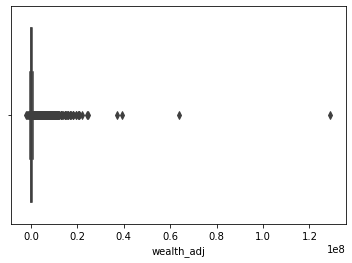

In [232]:
sns.boxplot(w)       

In [256]:
w[w > 1000000] = 0

In [257]:
pd.cut(w, 10)

individual_id  YEAR
2615188        2013    (-2188270.797, -1866577.655]
2615032        2019    (-2188270.797, -1866577.655]
               2021    (-1548069.594, -1229561.533]
2831171        2019     (-1229561.533, -911053.472]
2181005        2013      (-911053.472, -592545.411]
                                   ...             
1377030        2019        (681486.833, 999994.894]
1074175        2019        (681486.833, 999994.894]
655003         2005        (681486.833, 999994.894]
2137003        2007        (681486.833, 999994.894]
1221004        2001        (681486.833, 999994.894]
Name: wealth_adj, Length: 22825, dtype: category
Categories (10, interval[float64, right]): [(-2188270.797, -1866577.655] < (-1866577.655, -1548069.594] < (-1548069.594, -1229561.533] < (-1229561.533, -911053.472] ... (-274037.35, 44470.711] < (44470.711, 362978.772] < (362978.772, 681486.833] < (681486.833, 999994.894]]

In [258]:
len(w[w == 0])

3346

In [269]:
len(w[w < -1000000])

3